# WeatherPy
----

### Analysis- Three Observable Trends
1. As we get closer to the equator line, where the latitude is zero, the temperature rises, and it decreases as we move away from it, confirming our expectation. However, it is very interesting to compare cities with the same latitude in opposite hemispheres (Northern vs. Southern), since we oberve there is a slight concnetration of the distribution of cities in higher temperatures in the Northern Hemisphere. This might be due to the time of the year (end of summer, beginning of fall) in the Northern Hemisphere and the tilt of the terrestrial globe. Would be interesting to have access to historical data, comparing different seasons around the globe (winter, fall, summer and spring).

2. Observing the City Latitude vs. Humidity plot, we do not observe any trend between these two variables, since there is not a clear pattern. However, it is interesting to observe there are cities in both hemispheres at 100% humidity.

3. Observing the City Latitude vs. Cloudiness plot, there is not a observable trend that correlates latitude and cloudiness. However, it is very interesting to note there are bands of cities at 0, 20 and 80 cloudiness. It would be interesting to compare historical data from different times of the day distributed along time of the year (different seasons) to establish if there is correlation between time of the day, time of the year (season), latitude and cloudiness. 


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:

# Building partial query URL with imperial system unit
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

city_ctr = 0
set_ctr = 1
cities_json = []

print(f"Beginning Data Retrieval")     
print(f"-----------------------------")
      
#Building cities_json using try_exception to handle cities without weather data
for city in cities:
    query_url = f"{url}appid={api_key}&units={units}&q="
    weather_json = requests.get(query_url + city).json()
    city_ctr += 1
      
    try:
        print(f"Processing Record " + str(city_ctr) + " of Set " + str(set_ctr) + " | " + city)
        city= weather_json["name"]
        cloudiness = weather_json["clouds"]["all"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        humidity = weather_json["main"]["humidity"]
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        max_temp = weather_json["main"]["temp_max"]
        wind_speed = weather_json["wind"]["speed"]
        
        cities_json.append({"City": city,"Cloudiness": cloudiness,"Country": country,
                            "Date": date,"Humidity": humidity,"Lat": lat,"Lng": lng,
                            "Max Temp": max_temp,"Wind Speed": wind_speed})        
                        
    except:
        print(f"City not found. Skipping...")
        
#OpenWeather API allows only 60 calls per minute (Free Account)       
    if city_ctr == 50:
            time.sleep(60) 
            city_ctr = 0
            set_ctr += 1
    
#printing the last rows to indicate that the processing log is over        
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")
  

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | road town
Processing Record 3 of Set 1 | paita
Processing Record 4 of Set 1 | saldanha
Processing Record 5 of Set 1 | shangzhi
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | dingle
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | kahului
Processing Record 11 of Set 1 | surgut
Processing Record 12 of Set 1 | rungata
City not found. Skipping...
Processing Record 13 of Set 1 | formosa do rio preto
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | pangnirtung
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | aksarka
Processing Record 19 of Set 1 | paicol
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | bonthe
Processing Recor

Processing Record 36 of Set 4 | amderma
City not found. Skipping...
Processing Record 37 of Set 4 | maltahohe
Processing Record 38 of Set 4 | east wenatchee bench
Processing Record 39 of Set 4 | channel-port aux basques
Processing Record 40 of Set 4 | sibolga
Processing Record 41 of Set 4 | morant bay
Processing Record 42 of Set 4 | grindavik
Processing Record 43 of Set 4 | tiksi
Processing Record 44 of Set 4 | barbar
City not found. Skipping...
Processing Record 45 of Set 4 | bambous virieux
Processing Record 46 of Set 4 | kieta
Processing Record 47 of Set 4 | santa rita
Processing Record 48 of Set 4 | avera
Processing Record 49 of Set 4 | tabat
Processing Record 50 of Set 4 | walvis bay
Processing Record 1 of Set 5 | camana
City not found. Skipping...
Processing Record 2 of Set 5 | port blair
Processing Record 3 of Set 5 | pangkalanbuun
Processing Record 4 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 5 | husavik
Processing Record 6 of Set 5 | moe

Processing Record 25 of Set 8 | yining
Processing Record 26 of Set 8 | kalmunai
Processing Record 27 of Set 8 | aswan
Processing Record 28 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 29 of Set 8 | qasigiannguit
Processing Record 30 of Set 8 | paamiut
Processing Record 31 of Set 8 | logansport
Processing Record 32 of Set 8 | yumen
Processing Record 33 of Set 8 | burica
City not found. Skipping...
Processing Record 34 of Set 8 | vallenar
Processing Record 35 of Set 8 | suez
Processing Record 36 of Set 8 | mattru
Processing Record 37 of Set 8 | greeneville
Processing Record 38 of Set 8 | tawkar
City not found. Skipping...
Processing Record 39 of Set 8 | khatra
Processing Record 40 of Set 8 | key west
Processing Record 41 of Set 8 | bonfim
Processing Record 42 of Set 8 | san quintin
Processing Record 43 of Set 8 | west bay
Processing Record 44 of Set 8 | najran
Processing Record 45 of Set 8 | saint-paul
Processing Record 46 of Set 8 | saleaula
City not found. Skipping.

Processing Record 9 of Set 12 | salalah
Processing Record 10 of Set 12 | schwedt
City not found. Skipping...
Processing Record 11 of Set 12 | gamba
Processing Record 12 of Set 12 | mnogovershinnyy
Processing Record 13 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 14 of Set 12 | adzope
Processing Record 15 of Set 12 | strezhevoy
Processing Record 16 of Set 12 | cap-aux-meules
Processing Record 17 of Set 12 | zhezkazgan
Processing Record 18 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 19 of Set 12 | horta
Processing Record 20 of Set 12 | ranfurly
Processing Record 21 of Set 12 | aleksandrov gay
Processing Record 22 of Set 12 | hirara
Processing Record 23 of Set 12 | raga
City not found. Skipping...
Processing Record 24 of Set 12 | baker city
Processing Record 25 of Set 12 | mari-turek
Processing Record 26 of Set 12 | tarudant
City not found. Skipping...
Processing Record 27 of Set 12 | lapua
Processing Record 28 of Set 12 | ahipara
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#Building pd dataframe from json file
df_cities = pd.DataFrame(cities_json)

#df to csv file with header but without index
df_cities.to_csv("city_data.csv", index=False, header=True)

In [13]:
#df count 
df_cities.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [14]:
#Displaying df first rows 
df_cities.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,40,AR,1537804800,74,-54.81,-68.31,41.00,21.92
1,Road Town,40,VG,1537804800,66,18.42,-64.62,89.60,11.41
2,Paita,0,PE,1537804800,290,-5.09,-81.11,62.60,10.29
3,Saldanha,0,PT,1537807857,39,41.42,-6.55,79.23,4.97
4,Shangzhi,12,CN,1537807857,99,45.21,127.96,44.58,5.08


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

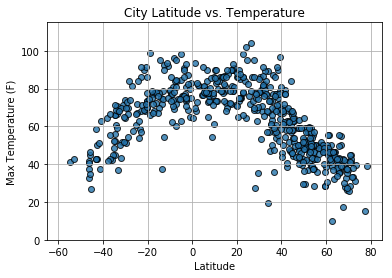

In [32]:
plt.scatter(df_cities["Lat"],df_cities["Max Temp"], marker="o", facecolors="#2474AC", edgecolors="black", alpha=0.8)
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.xlim(-65,85)
plt.ylim(0,115)
plt.grid()
plt.savefig("temp.png")
plt.show()

#### Latitude vs. Humidity Plot

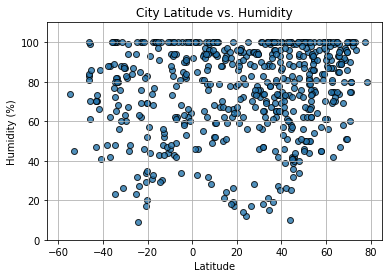

In [20]:
plt.scatter(df_cities["Lat"],df_cities["Humidity"], marker="o", facecolors="#2474AC", edgecolors="black", alpha=0.8)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.xlim(-65,85)
plt.ylim(0,110)

plt.grid()
plt.savefig("humidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

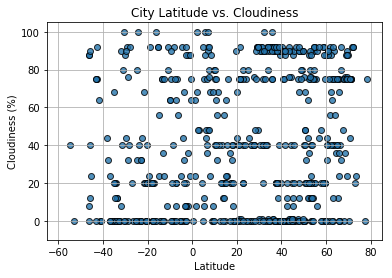

In [26]:
plt.scatter(df_cities["Lat"],df_cities["Cloudiness"], marker="o", facecolors="#2474AC", edgecolors="black", alpha=0.8)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.xlim(-65,85)
plt.ylim(-10,105)

plt.grid()
plt.savefig("cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

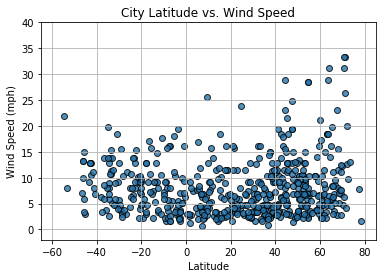

In [22]:
plt.scatter(df_cities["Lat"],df_cities["Wind Speed"], marker="o", facecolors="#2474AC", edgecolors="black", alpha=0.8)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.xlim(-65,85)
plt.ylim(-2,40)
plt.grid()
plt.savefig("wind.png")
plt.show()